<a href="https://colab.research.google.com/github/Centipede5/triathalon_rankings/blob/main/Triathalon_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
 
sh = gc.open('2022 USAT Development Series Results')

worksheet = sh.worksheet('M19') 

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)
 
import pandas as pd
df = pd.DataFrame.from_records(rows)

[['Name', 'Team', 'Sex', 'Birth Year', 'Race Year', 'Race Age', 'Richmond-Pl', 'Pleasant-Pl', 'JennyLee-Prelim1-Pl', 'JennyLee-Prelim2-Pl', 'JennyLee-BFinal-Pl', 'JennyLee-AFinal-Pl', 'JennyLee-Overall-Pl', 'Flatland-Pl', 'Monroe-Pl', 'Nationals-M17-Pl', 'Nationals-M19-Pl', 'Richmond-Pts', 'Pleasant-Pts', 'JennyLee-Pts', 'Flatland-Pts', 'Monroe-Pts', 'Nationals-M17-Pts', 'Nationals-M19-Pts', 'Total-Pts', 'Qualify'], ['Keller Norland', 'Project Podium', 'M', '2003', '2022', '19', '1', '1', '1', '', '', '1', '1', '1', '1', '', '1', '1000', '1000', '1000', '1000', '1000', '0', '1250', '3250', '1'], ['Cole Jamieson', 'BAM Juniors', 'M', '2004', '2022', '18', '', '18', '', '9', '', '7', '7', '', '3', '', '2', '0', '418', '735', '0', '903', '0', '1188', '2826', '23'], ['Sullivan Middaugh', 'Project Podium', 'M', '2004', '2022', '18', '', '3', '', '7', '', '12', '12', '10', '', '', '3', '0', '903', '569', '630', '0', '0', '1128', '2661', '17'], ['Daniel Gossow', 'Superkids Multisport', 'M', '

In [ ]:
df.columns=df.iloc[0]
df = df.drop(labels=0,axis=0)

In [ ]:
if 'JennyLee-Overall-Pl' in df.columns:
  df = df.rename(columns ={'JennyLee-Pts':'JennyLee-Overall-Pts'})
df.columns

Index(['Name', 'Team', 'Sex', 'Birth Year', 'Race Year', 'Race Age',
       'Richmond-Pl', 'Pleasant-Pl', 'JennyLee-Prelim1-Pl',
       'JennyLee-Prelim2-Pl', 'JennyLee-BFinal-Pl', 'JennyLee-AFinal-Pl',
       'JennyLee-Overall-Pl', 'Flatland-Pl', 'Monroe-Pl', 'Nationals-M17-Pl',
       'Nationals-M19-Pl', 'Richmond-Pts', 'Pleasant-Pts',
       'JennyLee-Overall-Pts', 'Flatland-Pts', 'Monroe-Pts',
       'Nationals-M17-Pts', 'Nationals-M19-Pts', 'Total-Pts', 'Qualify'],
      dtype='object', name=0)

In [ ]:
df.fillna(-1)
for ci in range(len(df.columns)):
  col = df.columns[ci]
  if ci>2:
    print(col,ci)
    df[col] = df[col].replace({'':'-1'}).astype('float')
df = df.replace({-1:(None)})

Birth Year 3
Race Year 4
Race Age 5
Richmond-Pl 6
Pleasant-Pl 7
JennyLee-Prelim1-Pl 8
JennyLee-Prelim2-Pl 9
JennyLee-BFinal-Pl 10
JennyLee-AFinal-Pl 11
JennyLee-Overall-Pl 12
Flatland-Pl 13
Monroe-Pl 14
Nationals-M17-Pl 15
Nationals-M19-Pl 16
Richmond-Pts 17
Pleasant-Pts 18
JennyLee-Overall-Pts 19
Flatland-Pts 20
Monroe-Pts 21
Nationals-M17-Pts 22
Nationals-M19-Pts 23
Total-Pts 24
Qualify 25


In [ ]:
df

,Name,Team,Sex,Birth Year,Race Year,Race Age,Richmond-Pl,Pleasant-Pl,JennyLee-Prelim1-Pl,JennyLee-Prelim2-Pl,...,Nationals-M19-Pl,Richmond-Pts,Pleasant-Pts,JennyLee-Overall-Pts,Flatland-Pts,Monroe-Pts,Nationals-M17-Pts,Nationals-M19-Pts,Total-Pts,Qualify
1,Keller Norland,Project Podium,M,2003.0,2022.0,19.0,1.0,1.0,1.0,None,...,1.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.0,1250.0,3250.0,1.0
2,Cole Jamieson,BAM Juniors,M,2004.0,2022.0,18.0,None,18.0,None,9.0,...,2.0,0.0,418.0,735.0,0.0,903.0,0.0,1188.0,2826.0,23.0
3,Sullivan Middaugh,Project Podium,M,2004.0,2022.0,18.0,None,3.0,None,7.0,...,3.0,0.0,903.0,569.0,630.0,0.0,0.0,1128.0,2661.0,17.0
4,Daniel Gossow,Superkids Multisport,M,2003.0,2022.0,19.0,5.0,4.0,None,2.0,...,4.0,815.0,857.0,857.0,569.0,950.0,0.0,1072.0,2879.0,4.0
5,Braxton Bokos,MMTT Elite,M,2004.0,2022.0,18.0,4.0,5.0,None,None,...,5.0,857.0,815.0,0.0,0.0,0.0,0.0,1018.0,2690.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Thomas Pichieri,,M,2006.0,2022.0,16.0,None,None,23.0,None,...,None,0.0,0.0,85.0,0.0,0.0,0.0,0.0,85.0,None
89,Rohan Atre,Get Fit Families,M,2003.0,2022.0,19.0,48.0,None,None,None,...,None,85.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,None
90,Michael Ferrell,MMTT Elite,M,2005.0,2022.0,17.0,None,None,None,26.0,...,None,0.0,0.0,81.0,0.0,0.0,0.0,0.0,81.0,None
91,Alexander Fang,,M,2005.0,2022.0,17.0,None,None,25.0,None,...,None,0.0,0.0,73.0,0.0,0.0,0.0,0.0,73.0,None


In [ ]:
df.columns[6:12]

Index(['Richmond-Pl', 'Pleasant-Pl', 'JennyLee-Prelim1-Pl',
       'JennyLee-Prelim2-Pl', 'JennyLee-BFinal-Pl', 'JennyLee-AFinal-Pl'],
      dtype='object', name=0)

In [ ]:
def expected_elo(player,enemy,d):
  return 1/(1+pow(10,(enemy-player)/d))
def tpts(player):
  return df['totalpts'][player]#df['pts1'][player]+df['pts2'][player]

In [ ]:
expected_elo(1400,1500,400)

0.35993500019711494

In [ ]:
def normalize(dist):
  return dist/np.sum(dist)
def i2p(i,l):
  return i/(l-1)#(i/l+1/(2*l))
def expected_prob(dist):
  dist = normalize(dist)
  exp = 0
  for i in range(len(dist)):
    exp += dist[i]*i2p(i,len(dist))
  return exp

In [ ]:
count_prelims = False
distfinal =[]
disthist = []
racenames = []
def run_elo(k,d,pd):
  global distfinal
  global disthist
  global racenames
  df['elo'] = [1500.0]*len(df.index)
  df['elotemp'] = [1500.0]*len(df.index)
  df['pts1'] = [0.]*len(df.index)
  df['pts2'] = [0.]*len(df.index)
  df['totalpts'] = [0.]*len(df.index)
  agegroups = ['19','17','13']
  ageranges = {'19':[18,19],'17':[16,17],'13':[13,14,15]}
  races = []
  for i in range(len(df.columns)):
    col = df.columns[i]
    if i>=6 and '-Pl' in col and (count_prelims or ('Final' not in col and 'Prelim' not in col)):
      races.append(col)
  races
  percents = []
  racenames = races

  N = 101
  dists = []
  for i in range(len(df.index)):
    dists.append(np.ones(N))

  for racename in races:
    race = df[racename]
    race = race.dropna()
    K = k#16#32
    stats = {'eg':0,'eb':0,'tg':0,'tb':0,'bg':0,'bb':0,'ep':np.zeros([11,2]),'sqerr':0}
    newdists = []
    for i in range(len(df.index)):
      newdists.append(np.ones(N))
    def resolve_pair(id1,id2,pl1,pl2):
      elo = expected_elo(df['elo'][id1],df['elo'][id2],400)
      
      won = pl1<pl2

      delta = ((K*np.power(np.abs(pl1-pl2),pd))/np.power(len(race.index),d))*(won-elo)

      winner = id2
      loser = id1
      if won:
        winner = id1
        loser = id2
      
      lp = expected_prob(dists[loser-1])
      wp = expected_prob(dists[winner-1])

      newdists[winner-1] = newdists[winner-1]*[i2p(x,N)*(1-lp)/(i2p(x,N)*(1-lp)+lp*(1-i2p(x,N))) for x in range(N)] # we won (x is prob we win) and (1-lp) is prob they loose
      newdists[loser-1] = newdists[loser-1]*[(1-i2p(x,N))*wp/((1-i2p(x,N))*wp+(1-wp)*i2p(x,N)) for x in range(N)] # they lost (x is prob they win) and 

      predicted = expected_prob(dists[id1-1])>expected_prob(dists[id2-1])

      stats['bg'] += int(predicted==won)
      stats['bb'] += int(predicted!=won)

      stats['sqerr'] += np.square((elo-float(won)))
      stats['eg'] += int(round(elo)==won)
      stats['eb'] += int(round(elo)!=won)

      stats['tg'] += int((tpts(id1)>tpts(id2))==won)
      stats['tb'] += int((tpts(id1)>tpts(id2))!=won)

      stats['ep'][math.floor(elo*10)][int(won)] += 1

      if count_prelims and 'Overall' in racename:
        print('non update round')
        pass
      else:
        df['elotemp'][id1]+=delta
        df['elotemp'][id2]-=delta

    for i1 in range(len(race.index)):
      for i2 in range(i1,len(race.index)):
        id2 = race.index[i2]
        id1 = race.index[i1]
        if id1 == id2:
          continue
        resolve_pair(id1,id2,race[id1],race[id2])
    print('race: ',racename)
    disthist.append(dists)
    expected = df.sort_values(by=['elo'], ascending=False)
    df['expected'] = [expected_prob(dists[i-1]) for i in df.index]
    expectedbayes = df.sort_values(by=['expected'], ascending=False)

    expectedtp = df.sort_values(by=['totalpts'], ascending=False)

    real = df.sort_values(by=[racename], ascending=True)

    for a in agegroups:
      if a in racename:
        expected = expected[expected['Race Age'].isin(ageranges[a])]
        expectedtp = expectedtp[expectedtp['Race Age'].isin(ageranges[a])]
        expectedbayes = expectedbayes[expectedbayes['Race Age'].isin(ageranges[a])]
        #print('This is a ',a,' race')

    
    
    

    for i in range(10):
      print((i+1),'.) \t',expected['Name'].values[i],'\t\t',expectedbayes['Name'].values[i],'\t\t',real['Name'].values[i],real.index[i],expected.index[i])
    correct = stats['eg']/(stats['eg']+stats['eb'])
    bcorrect = stats['bg']/(stats['bg']+stats['bb'])

    tcorrect = stats['tg']/(stats['tg']+stats['tb'])

    print('Percent correct matchups (elo):         ',round(100*correct),'%')
    print('Percent correct matchups (bayes):         ',round(100*bcorrect),'%')
    print('Percent correct matchups (totalpoints): ',round(100*tcorrect),'%')

    nranks = [3,5]
    logranks = {
        'elo':expected,
        'bayes':expectedbayes,
        'tp':expectedtp,
    }
    for nrank in nranks:
      for system in logranks:
        err = 0
        lr = logranks[system]
        topn = list(lr.index[:nrank])
        for i in range(nrank):
          #print(topn[i],list(real.index).index(topn[i]))
          err += np.log2(list(real.index).index(topn[i])+1)
        print('logrank ['+str(nrank)+'] (',system,'): ',err)
    
    df['elo-'+racename] = df['elo']
    df['elo'] = df['elotemp']

    dists = [normalize(dists[d]*newdists[d]) for d in range(len(dists))]
    

    for id in race.index:
      ptc = racename.replace('-Pl','-Pts')
      if ptc not in df.columns:
        continue
      pts = df[ptc][id]
      if pts > df['pts1'][id]:
        df['pts2'][id] = df['pts1'][id]
        df['pts1'][id] = pts#race[id]
      elif pts > df['pts2'][id]:
        df['pts2'][id] = pts
      
      df['totalpts'][id] = df['pts2'][id]+df['pts1'][id]

    percents.append(correct)
  print(percents)
  print(stats['ep'])
  stats['score'] = stats['sqerr']#np.mean(np.power((1-np.array(percents[1:])),2))
  distfinal = dists
  return stats

In [ ]:
stats = run_elo(32,0,0)#run_elo(61.92945397145871, 0.7104927079519447, 0.45079789548462684)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


race:  Richmond-Pl
1 .) 	 Keller Norland 		 Keller Norland 		 Keller Norland 1 1
2 .) 	 Alex Urling 		 Alex Urling 		 Eli McWard 30 59
3 .) 	 Noah Jina 		 Noah Jina 		 Luke Anthony 51 68
4 .) 	 Quinton Moats 		 Quinton Moats 		 Braxton Bokos 5 67
5 .) 	 Brave Mays 		 Brave Mays 		 Daniel Gossow 4 66
6 .) 	 Hezekiah Martin 		 Hezekiah Martin 		 Carson Vanderschaaf 32 65
7 .) 	 Rohan Takkar 		 Rohan Takkar 		 Jackson Foster 34 64
8 .) 	 Owen Evans 		 Owen Evans 		 Julian Barre 24 63
9 .) 	 Colin Hallmark 		 Colin Hallmark 		 Sterling Sharpe 36 62
10 .) 	 Alexander Zon 		 Alexander Zon 		 Jake Adler 28 61
Percent correct matchups (elo):          25 %
Percent correct matchups (bayes):          25 %
Percent correct matchups (totalpoints):  25 %
logrank [3] ( elo ):  11.106562940444883
logrank [3] ( bayes ):  11.106562940444883
logrank [3] ( tp ):  11.106562940444883
logrank [5] ( elo ):  23.62127699458337
logrank [5] ( bayes ):  23.62127699458337
logrank [5] ( tp ):  23.62127699458337


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


race:  Pleasant-Pl
1 .) 	 Keller Norland 		 Keller Norland 		 Keller Norland 1 1
2 .) 	 Eli McWard 		 Eli McWard 		 Reese Vannerson 25 30
3 .) 	 Luke Anthony 		 Luke Anthony 		 Sullivan Middaugh 3 51
4 .) 	 Braxton Bokos 		 Braxton Bokos 		 Daniel Gossow 4 5
5 .) 	 Daniel Gossow 		 Daniel Gossow 		 Braxton Bokos 5 4
6 .) 	 Carson Vanderschaaf 		 Carson Vanderschaaf 		 Owen Schessler 6 32
7 .) 	 Jackson Foster 		 Jackson Foster 		 Gabriel Shreve 11 34
8 .) 	 Julian Barre 		 Julian Barre 		 Blake Bullard 22 24
9 .) 	 Sterling Sharpe 		 Sterling Sharpe 		 Julian Barre 24 36
10 .) 	 Jake Adler 		 Jake Adler 		 Noah Petersen 10 28
Percent correct matchups (elo):          59 %
Percent correct matchups (bayes):          59 %
Percent correct matchups (totalpoints):  61 %
logrank [3] ( elo ):  12.056637715113201
logrank [3] ( bayes ):  12.056637715113201
logrank [3] ( tp ):  12.056637715113201
logrank [5] ( elo ):  16.378565810000563
logrank [5] ( bayes ):  16.378565810000563
logrank [5] ( tp )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


race:  JennyLee-Overall-Pl
1 .) 	 Reese Vannerson 		 Keller Norland 		 Keller Norland 1 25
2 .) 	 Keller Norland 		 Reese Vannerson 		 Carter Stuhlmacher 8 1
3 .) 	 Sullivan Middaugh 		 Sullivan Middaugh 		 Sam Tullis 31 3
4 .) 	 Noah Petersen 		 Eli McWard 		 Daniel Gossow 4 10
5 .) 	 Eli McWard 		 Luke Anthony 		 Owen Schessler 6 30
6 .) 	 Luke Anthony 		 Daniel Gossow 		 Noah Petersen 10 51
7 .) 	 Daniel Gossow 		 Braxton Bokos 		 Cole Jamieson 2 4
8 .) 	 Braxton Bokos 		 Carson Vanderschaaf 		 Hudson Hamilton 29 5
9 .) 	 Carson Vanderschaaf 		 Julian Barre 		 Jake Adler 28 32
10 .) 	 Jackson Foster 		 Jackson Foster 		 Julian Barre 24 34
Percent correct matchups (elo):          71 %
Percent correct matchups (bayes):          69 %
Percent correct matchups (totalpoints):  77 %
logrank [3] ( elo ):  9.515699838284043
logrank [3] ( bayes ):  9.515699838284043
logrank [3] ( tp ):  7.727920454563199
logrank [5] ( elo ):  18.054858649392074
logrank [5] ( bayes ):  21.599179165615883
logra

In [ ]:
df.to_csv('results.csv')

In [ ]:
def plot_dist(i):
  figure(figsize=(8, 6), dpi=80)
  plt.title(df['Name'][i+1]+' Win Prob Distribution')
  plt.plot([i2p(i,101) for i in range(101)],normalize(distfinal[i]))

In [ ]:
round(len(df.index)/2)

46

In [ ]:
round

<function round(number, ndigits=None)>

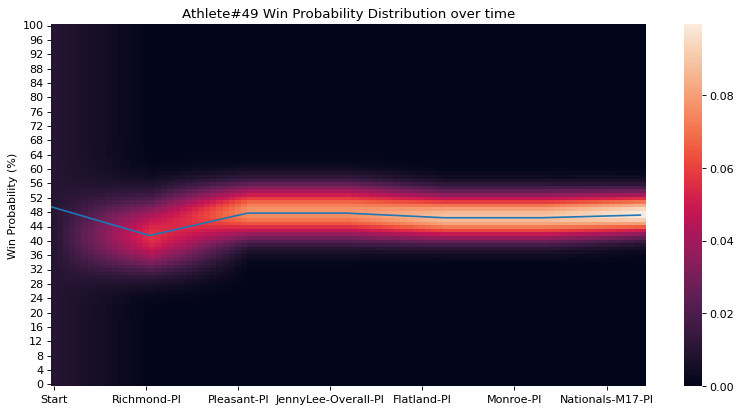

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as pll
figure(figsize=(12, 6), dpi=80)

pindex = round(len(df.index)/2)+2
nraces = len(disthist)
onedata = []
for i in range(len(disthist)):
  onedata.append(normalize(disthist[i][pindex]))

int_rounds = 4
for r in range(int_rounds):
  l = onedata
  zl = list(zip(l,l))#list(np.array(list(zip(l,l))).flatten())
  l = []
  for e in zl:
    l.append(e[0])
    l.append(e[1])
  for i in range(1,len(l)-1,2):
    l[i] = (l[i-1] + l[i+1])/2
  l.pop()
  onedata = l


expprob = [expected_prob(onedata[i])*100 for i in range(len(onedata))]

onedata = np.array(onedata).transpose()
ax = sns.heatmap(onedata,xticklabels = int(len(onedata)/nraces)+1, linewidth=0)
ax.plot(expprob)
ax.invert_yaxis()
ax.set_ylabel("Win Probability (%)")
# ax.set_xticks(range(nraces))
ax.set_xticklabels(['Start']+racenames)
pll.title('Athlete#'+str(pindex+1)+' Win Probability Distribution over time')
pll.savefig('curio.png')
pll.show()
